## Sentiment Analysis using COVID-19 Tweets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
sns.set_style()

In [2]:
df_train = pd.read_csv("data/Corona_NLP_train.csv", encoding="ISO-8859-1")
df_test = pd.read_csv("data/Corona_NLP_test.csv", encoding="ISO-8859-1")

In [3]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
# extract only tweets and sentiments columns 
df_train = df_train.iloc[:, -2:] 
df_test = df_test.iloc[:, -2:]

In [6]:
print(df_train.shape)
print(df_test.shape)
print("\n")
print(df_train.info(), "\n")
print(df_test.info())

(41157, 2)
(3798, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  3798 non-null   object
 1   Sentiment      3798 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB
None


In [7]:
# double check missing
print(df_train.isna().sum(), "\n")
print(df_test.isna().sum())

OriginalTweet    0
Sentiment        0
dtype: int64 

OriginalTweet    0
Sentiment        0
dtype: int64


In [8]:
print(df_train.Sentiment.unique(),'\n')
# extreme sentiments combined to their moderate groups

# Merge extreme classes 
df_train.Sentiment = df_train.Sentiment.replace(['Extremely Negative'], 'Negative')
df_train.Sentiment = df_train.Sentiment.replace(['Extremely Positive'], 'Positive')

df_test.Sentiment = df_test.Sentiment.replace(['Extremely Negative'], 'Negative')
df_test.Sentiment = df_test.Sentiment.replace(['Extremely Positive'], 'Positive')

print(df_train.Sentiment.unique())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive'] 

['Neutral' 'Positive' 'Negative']


### explore sentiment and tweet features

In [9]:
# number of tweets per class
senti_count = df_train.groupby('Sentiment').count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet', ascending=False)
senti_count.style.background_gradient(cmap='Blues')

,Sentiment,OriginalTweet
2,Positive,18046
0,Negative,15398
1,Neutral,7713


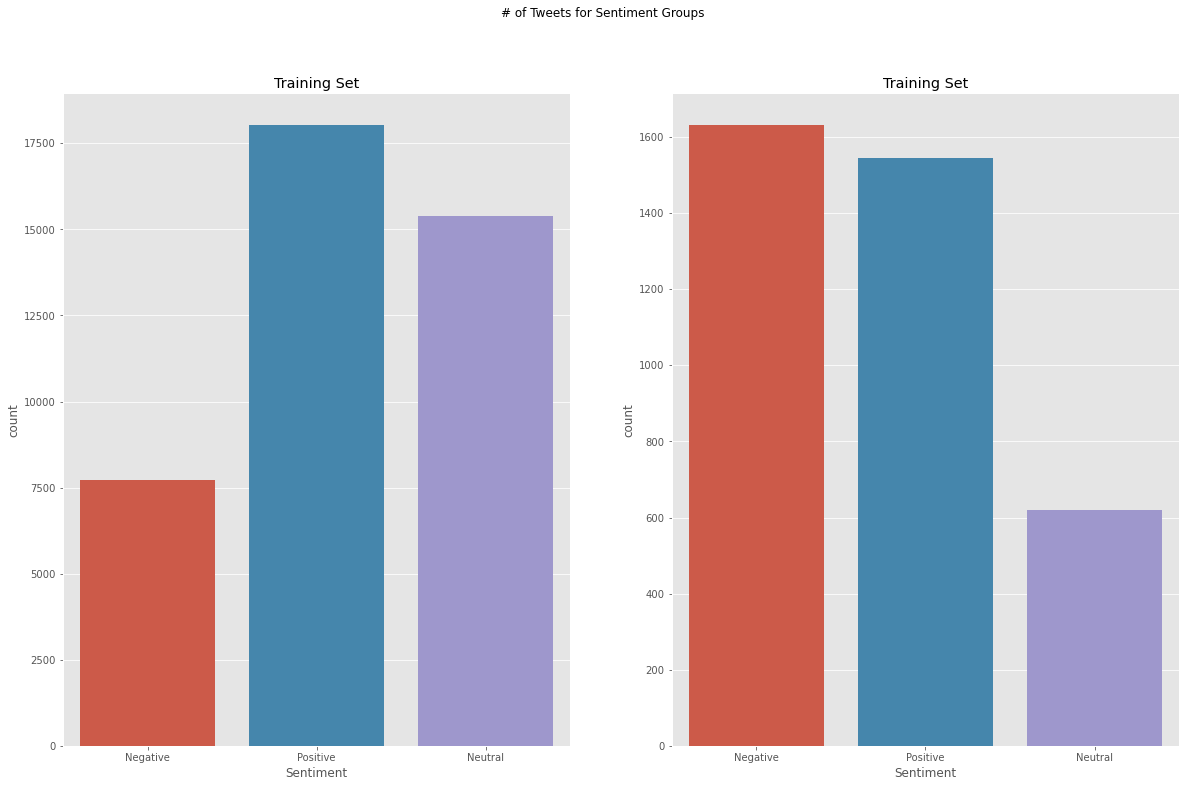

In [10]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,12))
fig.suptitle('# of Tweets for Sentiment Groups')
axes[0].set_title('Training Set')
axes[1].set_title('Training Set')

sns.countplot(df_train.Sentiment,ax=axes[0]);
sns.countplot(df_test.Sentiment,ax=axes[1]);


### examine average number of characters and words for each group

In [11]:
# num of characters
df_train['num_of_chars'] = df_train.OriginalTweet.apply(lambda x: len(x))
df_test['num_of_chars'] = df_test.OriginalTweet.apply(lambda x: len(x))


# num of words
df_train['num_of_words'] = df_train.OriginalTweet.apply(lambda x: len(str(x).split()))
df_test['num_of_words'] = df_test.OriginalTweet.apply(lambda x: len(str(x).split()))


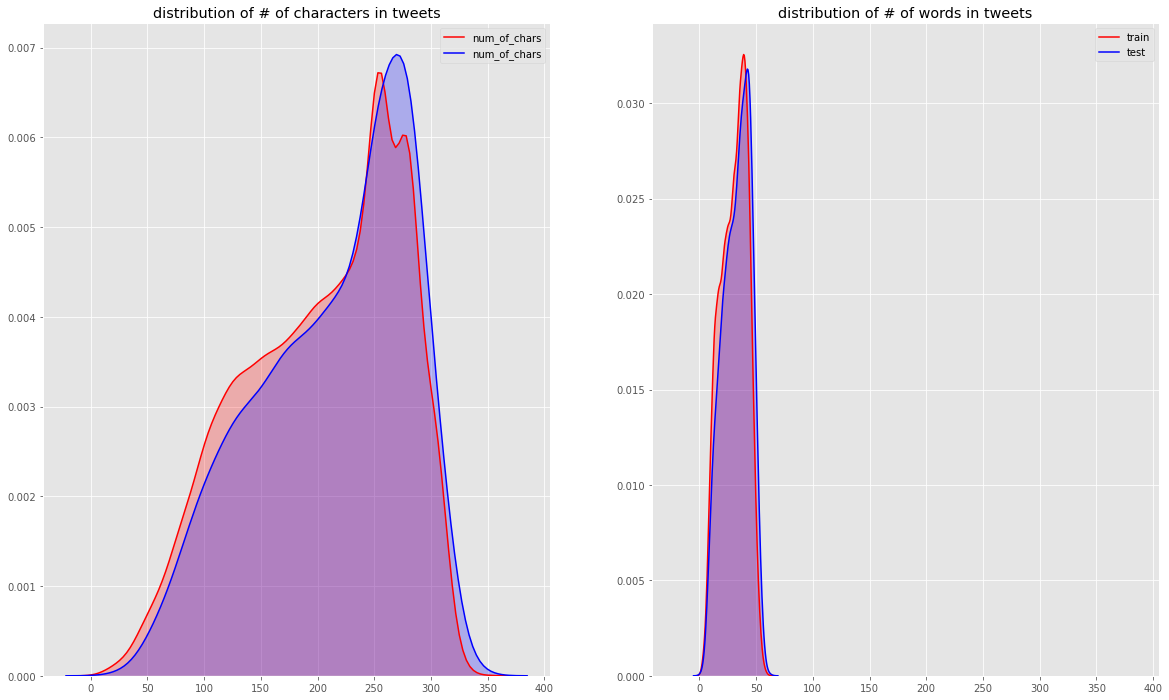

In [12]:
fig, axes = plt.subplots(1,2, figsize=(20,12),sharex=True)

sns.kdeplot(df_train.num_of_chars, shade=True, color='r', legend=True, ax=axes[0])
sns.kdeplot(df_test.num_of_chars, shade=True, color='b', legend=True, ax=axes[0])
axes[0].set_title('distribution of # of characters in tweets')
plt.legend(('train','test'));



sns.kdeplot(df_train.num_of_words, shade=True, color='r', legend=True, ax=axes[1])
sns.kdeplot(df_test.num_of_words, shade=True, color='b', legend=True, ax=axes[1])
axes[1].set_title('distribution of # of words in tweets')
plt.legend(('train','test'));

<ipython-input-13-7d5340af41d6>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(sentiments, sentiment_mean, color='rgb', alpha=0.5)


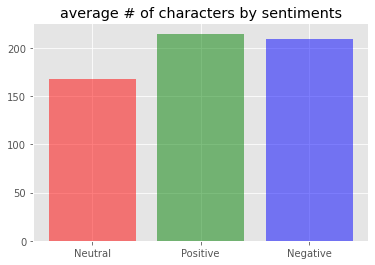

In [13]:
# examine average of characters per sentiments classses
sentiments = df_train.Sentiment.unique()

sentiment_mean = []
for sentiment in sentiments:
    sentiment_mean.append(df_train[df_train.Sentiment == sentiment]['num_of_chars'].mean())

plt.bar(sentiments, sentiment_mean, color='rgb', alpha=0.5)
plt.title('average # of characters by sentiments');

<ipython-input-14-863d9181d415>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(sentiments, sentiment_mean, color='rgb', alpha=0.5)


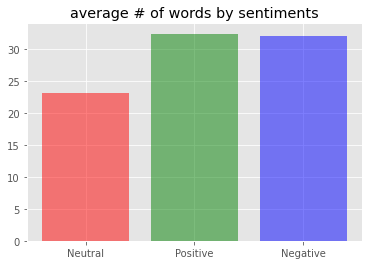

In [14]:
# examine averages
sentiments = df_train.Sentiment.unique()

sentiment_mean = []
for sentiment in sentiments:
    sentiment_mean.append(df_train[df_train.Sentiment == sentiment]['num_of_words'].mean())

plt.bar(sentiments, sentiment_mean, color='rgb', alpha=0.5)
plt.title('average # of words by sentiments');

### preprocesssing

In [42]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer
import preprocessor as p
import re
from string import punctuation
from nltk.tokenize import sent_tokenize 

nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
porter = PorterStemmer()
stopwords = list(stopwords.words("english"))
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cspar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cspar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# hash tags (if necessary for future studies)

df_test["hashtag"] = df_test.OriginalTweet.apply(lambda x: re.findall(r"#(\w+)", str(x)))
df_train["hashtag"] = df_train.OriginalTweet.apply(lambda x: re.findall(r"#(\w+)", str(x)))

print(df_train["hashtag"].values[:5])

[list([]) list([]) list([])
 list(['COVID19france', 'COVID_19', 'COVID19', 'coronavirus', 'confinement', 'Confinementotal', 'ConfinementGeneral'])
 list(['COVID19', 'coronavirus', 'CoronavirusFrance', 'restezchezvous', 'StayAtHome', 'confinement'])]


In [30]:
df_train["OriginalTweet"].values[0].split()

['@MeNyrbie',
 '@Phil_Gahan',
 '@Chrisitv',
 'https://t.co/iFz9FAn2Pa',
 'and',
 'https://t.co/xX6ghGFzCC',
 'and',
 'https://t.co/I2NlzdxNo8']

In [52]:

def clean_tweet(text):
    text = p.clean(text)
    text = str(text).split()
    text = [text.lower() for text in text]
    text = [
        re.sub(r"[%s]" % re.escape(punctuation), " ", text) for text in text
    ]    
    text = [re.sub(r"(\W|\d+)", " ", text) for text in text]
#     text = [p.clean(text) for text in text]
    text = [re.sub(r"\W+|\w\d+\w|amp|corona\w*|\w*corona|\w*virus|virus\w*|covid\w*|\w*covid|COVID\w*|\w*COVID", '', text) for text in text]
    text = [lemmatizer.lemmatize(text) for text in text]
    text = [text for text in text if text not in stopwords]
    text = [porter.stem(text) for text in text]
    text = [text for text in text if len(text) > 2]
#     any coronavirus | covid related words were removed cause of their extreme counts
    return " ".join([text.lstrip() for text in text])


In [53]:
df_train["CleanedTweet"] = df_train["OriginalTweet"].apply(lambda x: clean_tweet(x))
df_test["CleanedTweet"] = df_test["OriginalTweet"].apply(lambda x: clean_tweet(x))


### retrieve common words among COVID tweets

In [54]:
from collections import Counter

def common_words(df):
    
    df['temp_list'] = df.CleanedTweet.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','Count']
    
    return temp

df_common_train = common_words(df_train)
df_common_test = common_words(df_test)

In [55]:
df_common_train.head(10)
## living expenses, necessities, and retail seem to be abundant in covid-tweets

,Common_words,Count
0,price,8798
1,store,8033
2,supermarket,7170
3,food,6850
4,groceri,6442
5,peopl,5511
6,consum,4918
7,shop,4787
8,get,3681
9,need,3508


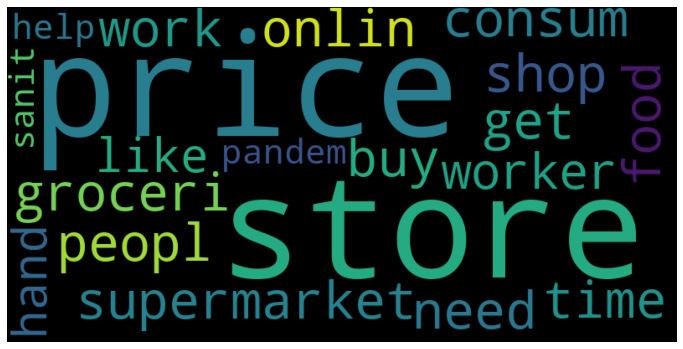

In [56]:
from wordcloud import WordCloud 

# top 50 common words thru wordcloud and PRICES, STORE, FOOD are quite large

fdist = FreqDist(df_common_train.Common_words)#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="hamming")
plt.axis("off")
plt.show()

In [57]:
import plotly.express as px

fig = px.bar(df_common_train, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words', )
fig.show()

In [58]:
# common words per various sentiment groups
Positive_sent_train = df_train[df_train['Sentiment']=='Positive']
Negative_sent_train = df_train[df_train['Sentiment']=='Negative']
Neutral_sent_train = df_train[df_train['Sentiment']=='Neutral']

neutral_count = common_words(Neutral_sent_train)
negative_count = common_words(Negative_sent_train) 
positive_count = common_words(Positive_sent_train) 

<ipython-input-54-03c68e4c3238>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
word_list = [w for words in df_train['temp_list'] for w in words]
word_list

['advic',
 'talk',
 'neighbour',
 'famili',
 'exchang',
 'phone',
 'number',
 'creat',
 'contact',
 'list',
 'phone',
 'number',
 'neighbour',
 'school',
 'employ',
 'chemist',
 'set',
 'onlin',
 'shop',
 'account',
 'adequ',
 'suppli',
 'regular',
 'med',
 'order',
 'australia',
 'woolworth',
 'give',
 'elderli',
 'disabl',
 'dedic',
 'shop',
 'hour',
 'amid',
 'outbreak',
 'food',
 'stock',
 'one',
 'emptypleas',
 'dont',
 'panic',
 'enough',
 'food',
 'everyon',
 'take',
 'need',
 'stay',
 'calm',
 'stay',
 'safe',
 'readi',
 'supermarket',
 'outbreaknot',
 'paranoid',
 'food',
 'stock',
 'litterali',
 'empti',
 'seriou',
 'thing',
 'pleas',
 'dont',
 'panic',
 'caus',
 'shortag',
 'news',
 'region',
 'first',
 'confirm',
 'case',
 'came',
 'sullivan',
 'counti',
 'last',
 'week',
 'peopl',
 'flock',
 'area',
 'store',
 'purchas',
 'clean',
 'suppli',
 'hand',
 'sanit',
 'food',
 'toilet',
 'paper',
 'good',
 'report',
 'cashier',
 'groceri',
 'store',
 'share',
 'insight',
 'prove'

In [60]:
def words_unique(sentiment, num_words, raw_words):

    allother = []
    for item in df_train[df_train.Sentiment != sentiment]['temp_list']:
        for word in item:
            allother.append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in word_list if x not in allother]
    
    mycounter = Counter()
    
    for item in df_train[df_train.Sentiment == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(num_words), columns = ['words','count'])
    
    return Unique_words

In [61]:
unique_pos=words_unique('Positive', 20,word_list)
unique_neg=words_unique('Negative', 20,word_list)
unique_neu=words_unique('Neutral', 20,word_list)


In [62]:
unique_pos.sort_values(by='count', ascending=False)[:10]

,words,count
0,peac,26
1,lotteri,18
2,gtgtgt,16
3,luckili,15
4,wineri,13
5,lmao,13
6,easyfundrais,12
7,complimentari,10
12,alabama,9
11,tribut,9


In [63]:
unique_neu.sort_values(by='count', ascending=False)[:10]

,words,count
0,supermercado,7
1,rotorua,6
2,dasani,5
3,beekeep,5
8,nclc,4
11,ocha,4
9,marla,4
10,morrisey,4
7,imhotep,4
6,junki,4


In [64]:
unique_neg.sort_values(by='count', ascending=False)[:10]

,words,count
0,lawsuit,20
1,ruin,18
2,cancer,17
3,brent,17
4,cheat,15
5,assault,15
6,tragedi,15
7,bankrupt,13
8,malici,12
9,inadequ,11


### modeling twitter sentiment

In [65]:
training_set = df_train[['Sentiment', 'CleanedTweet']]
testing_set = df_test[['Sentiment', 'CleanedTweet']]

In [66]:
map_sentiment = {"Negative":0,
                 "Neutral":1,
                 "Positive":2,
                }

training_set['Sentiment'] = training_set['Sentiment'].map(map_sentiment)
testing_set['Sentiment'] = testing_set['Sentiment'].map(map_sentiment)

<ipython-input-66-e143e1c37b90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-e143e1c37b90>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
print(training_set.Sentiment.value_counts())
print('\n')
print(testing_set.Sentiment.value_counts())

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64


0    1633
2    1546
1     619
Name: Sentiment, dtype: int64


### Train

In [68]:
y_train = training_set["Sentiment"].copy()
y_test = testing_set["Sentiment"].copy()


X_train = training_set["CleanedTweet"].copy()
X_test = testing_set['CleanedTweet'].copy()

In [69]:
### for parameters
import keras 
from keras.preprocessing.text import Tokenizer

max_len = max([len(x) for x in X_train])


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# training word index
word_index = tokenizer.word_index

vocab_length = len(word_index) + 1

print("Word index:\n", word_index)

print("Vocab length:", vocab_length)
print("Max sequence length:", max_len)
embedding_dim = 16

Word index:
 {'price': 1, 'store': 2, 'supermarket': 3, 'food': 4, 'groceri': 5, 'peopl': 6, 'consum': 7, 'shop': 8, 'get': 9, 'need': 10, 'onlin': 11, 'time': 12, 'buy': 13, 'work': 14, 'worker': 15, 'like': 16, 'hand': 17, 'pandem': 18, 'help': 19, 'sanit': 20, 'stock': 21, 'panic': 22, 'demand': 23, 'home': 24, 'make': 25, 'one': 26, 'suppli': 27, 'day': 28, 'take': 29, 'due': 30, 'dont': 31, 'keep': 32, 'new': 33, 'use': 34, 'see': 35, 'mask': 36, 'stay': 37, 'week': 38, 'busi': 39, 'crisi': 40, 'pleas': 41, 'market': 42, 'retail': 43, 'say': 44, 'toilet': 45, 'oil': 46, 'product': 47, 'local': 48, 'paper': 49, 'shelf': 50, 'good': 51, 'today': 52, 'deliveri': 53, 'thank': 54, 'mani': 55, 'increas': 56, 'via': 57, 'still': 58, 'know': 59, 'essenti': 60, 'stop': 61, 'close': 62, 'look': 63, 'spread': 64, 'impact': 65, 'protect': 66, 'think': 67, 'custom': 68, 'servic': 69, 'would': 70, 'social': 71, 'even': 72, 'way': 73, 'outbreak': 74, 'staff': 75, 'come': 76, 'thing': 77, 'order'

In [70]:
# encode sentences into sequences

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [71]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

In [72]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [73]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 220, 16)           492704    
_________________________________________________________________
bidirectional (Bidirectional (None, 220, 512)          420864    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 946,725
Trainable params: 946,725
Non-trainable params: 0
__________________________________________________

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41157, 220), (3798, 220), (41157,), (3798,))

In [75]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [ ]:
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, 
                    validation_data=(X_test, y_test))

Epoch 1/10
 763/1287 [================>.............] - ETA: 4:39 - loss: 1.0511 - accuracy: 0.4438

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(f"Accuracy Train Set: {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy Validaiton Set: {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc,'b',label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.legend()
plt.show()


plt.plot(epochs, loss,'b',label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(X_test)

In [ ]:
cm = confusion_matrix(np.argmax(y_test,1),pred)
cm

In [ ]:
sns.heatmap(cm,annot=True, cmap='Blues')

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [ ]:
print(classification_report(np.argmax(y_test,1),pred))

In [175]:
# Save the weights
model.save('covid_twitter.h5')

# Create a new model instance
# model = create_model()

# # Restore the weights
# model.load_weights('./checkpoints/my_checkpoint')
